<a href="https://colab.research.google.com/github/nicolemaracaja/IA-UFCG-/blob/main/Sinton_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinton.IA: Agente Inteligente para Criação de Playlists Personalizadas

**Disciplina:** Inteligência Artificial - Turma 01

**Professor(a):** Herman Martin Gomes

**Integrantes:**

*   Francivaldo Cabral de Andrade - 121111029
*   Gustavo da Silva Soares - 121110455
*   Jhonnathas Swerley Farias dos Santos - 120210932
*   Nicolas Wesley Correia Paz - 123110202
*   Nicole Brito Maracajá - 123111413

---
# 1. Introdução

### Resumo
Com a enorme quantidade de músicas disponíveis em plataformas de streaming, descobrir faixas que realmente combinem com o usuário tornou-se desafiador. Este projeto apresenta o Sinton.IA, um agente inteligente capaz de recomendar músicas e criar playlists personalizadas. O sistema utiliza análise de letras de músicas, considerando o humor e as preferências musicais do usuário. Técnicas de processamento de texto e algoritmos de Aprendizado de Máquina são empregados para classificar as músicas e gerar recomendações relevantes e adaptativas.

### Objetivos

* **Objetivo Principal:** Desenvolver um agente funcional em um Notebook Python capaz de gerar playlists personalizadas com base no perfil e estado emocional do usuário.
* **Objetivos Secundários:**
    * Implementar a análise de letras de músicas para identificar temas, emoções e padrões linguísticos.
    * Treinar e avaliar modelos de Machine Learning para classificação de músicas por humor, gênero e conteúdo lírico.
    * Construir uma interface de usuário simples e interativa para a interação com o agente.
    * Analisar a performance dos modelos e discutir os resultados obtidos.

### Metodologia
O projeto foi estruturado nas seguintes etapas:
1.  **Coleta e Análise de Dados:** Seleção e exploração de bases de dados musicais públicas, incluindo letras e metadados das músicas.
2.  **Extração de Características:** Transformação das letras em vetores de características numéricas, análise de sentimentos e identificação de padrões textuais.
3.  **Modelagem e Treinamento:** Treinamento e avaliação de modelos de classificação supervisionada.
4.  **Implementação do Agente:** Desenvolvimento da lógica de recomendação e da interface do usuário.

---
# 2. Instalação de bibliotecas necessárias

Para a criação do nossio agente inteligente, iremos instalar as seguintes bibliotecas:
1.   `requests` → Para fazer requisições à API do Deezer.
2.   `pandas` → Para manipulação de tabelas e DataFrames.
3.   `librosa` → Para análise de áudio (extração de features musicais).
4.   `scikit-learn` → Para modelos de Machine Learning, normalização e treino.
5.   `pydub / soundfile` → Para manipulação de arquivos de áudio.
6.   `numpy` → Para cálculos numéricos e vetoriais.
7. `tqdm` → Para mostrar barras de progresso (útil em loops longos).





In [ ]:
!pip install requests pandas librosa scikit-learn pydub soundfile numpy tqdm

---
# 3. Importações

Aqui, importamos as bibliotecas instaladas e algumas funções que serão úteis no decorrer do código.

In [ ]:
import requests
import pandas as pd
import numpy as np
import os
import time

# funções para processamento de áudio
import librosa
from pydub import AudioSegment

# funções para interatividade e visualização
from tqdm.notebook import tqdm
from IPython.display import display, Audio

# função para normalização de dados
from sklearn.preprocessing import MinMaxScaler

print("Bibliotecas importadas com sucesso!")

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Bibliotecas importadas com sucesso!


---
# 4. Coleta de Dados via API do Deezer

---
### 4.1. Função genérica para pegar os dados da API e tratar os possíveis erros

In [ ]:
def fetchData(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            return {"error": f"Erro na API. Status code: {response.status_code}", "data": []}
    except requests.exceptions.RequestException as e:
        return {"error": f"Erro de conexão: {e}", "data": []}

---
### 4.2. Busca de Músicas com a API do Deezer usando um termo de pesquisa



In [ ]:
def fetchSongs(term, limit=25):
    url = f"https://api.deezer.com/search?q={term}&limit={limit}"
    data = fetchData(url)
    return data

---
### 4.3. Criando dataframe do Pandas com as informações das músicas

In [ ]:
def insertSongsIntoDataFrame(songsInfo):
    musicas = []
    for song in songsInfo.get("data", []):
        if song.get("preview"):
            musicas.append({
                "Artista": song["artist"]["name"],
                "Música": song["title"],
                "Álbum": song["album"]["title"],
                "Prévia_URL": song["preview"]
            })
    df_inicial = pd.DataFrame(musicas)
    return df_inicial

---
### 4.4. Executando a busca e criando o DataFrame

In [ ]:
termo_de_busca = "ABBA"
print(f"Buscando músicas para o termo: '{termo_de_busca}'...")

dados_musicas = fetchSongs(termo_de_busca, limit=50)
df_inicial = insertSongsIntoDataFrame(dados_musicas)

print(f"{len(df_inicial)} músicas com prévia de áudio encontradas.")
display(df_inicial.head())

Buscando músicas para o termo: 'ABBA'...
50 músicas com prévia de áudio encontradas.


,Artista,Música,Álbum,Prévia_URL
0,ABBA,Dancing Queen,ABBA Gold,https://cdnt-preview.dzcdn.net/api/1/1/9/1/6/0...
1,ABBA,The Winner Takes It All,ABBA Gold,https://cdnt-preview.dzcdn.net/api/1/1/f/9/f/0...
2,ABBA,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA Gold,https://cdnt-preview.dzcdn.net/api/1/1/2/2/6/0...
3,ABBA,Lay All Your Love On Me,Abba Gold Anniversary Edition,https://cdnt-preview.dzcdn.net/api/1/1/7/d/e/0...
4,ABBA,Mamma Mia,ABBA Gold,https://cdnt-preview.dzcdn.net/api/1/1/2/f/4/0...


---
### 4.5. Testando prévia de 30 segundos da música

In [ ]:
from IPython.display import Audio

result = fetchSongs("ABBA")

if "data" in result and len(result["data"]) > 0:
    song = result["data"][0]
    print(f"Tocando: {song['title']} - {song['artist']['name']}")
    preview_url = song["preview"]

    display(Audio(preview_url))
else:
    print("Nenhuma música encontrada.")

Tocando: Dancing Queen - ABBA


---
# 5. Coleta de Dados via API do Lyrics.ovh

---
### 5.1. Função genérica para pegar os dados da API

In [ ]:
api_url = "https://api.lyrics.ovh"

def fetchLyrics(artist, songTitle):
    url = f"{api_url}/v1/{artist}/{songTitle}"
    data = fetchData(url)
    return data.get("lyrics", "Letra não encontrada.")

---
### 5.2. Busca de letras com a API do Lyrics usando um termo de pesquisa

In [ ]:
letra = fetchLyrics("ABBA", "Dancing Queen")

print(letra[:1000])

Ooh
You can dance
You can jive
Having the time of your life
Ooh, see that girl
Watch that scene

Dig in the dancing queen



Friday night and the lights are low

Looking out for a place to go

Where they play the right music

Getting in the swing

You come to look for a king

Anybody could be that guy

Night is young and the music's high

With a bit of rock music

Everything is fine

You're in the mood for a dance

And when you get the chance



You are the dancing queen

Young and sweet

Only seventeen

Dancing queen

Feel the beat from the tambourine, oh yeah

You can dance

You can jive

Having the time of your life

Ooh, see that girl

Watch that scene

Dig in the dancing queen



You're a teaser, you turn 'em on

Leave 'em burning and then you're gone

Looking out for another

Anyone will do

You're in the mood for a dance

And when you get the chance



You are the dancing queen

Young and sweet

Only seventeen

Dancing queen

Feel the beat from the tambourine, oh yeah

You 




---


#  6. Extração de features e tratamento de Aúdio


Para analisar as propriedades sonoras de cada faixa, utilizamos os trechos de áudio de 30 segundos (preview) obtidos.

---
### 6.1. Baixando o arquivo de áudio da prévia de 30s e salvando-os localmente

In [ ]:
def download_preview(url, save_path):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            return os.path.getsize(save_path) > 0
    except requests.exceptions.RequestException:
        return False
    return False

---
### 6.2. Usando o librosa para extrair features musicais de cada preview

In [ ]:
from pydub import AudioSegment

def convert_audio(input_path, output_path, format="wav"):
  audio = AudioSegment.from_file(input_path)
  audio.export(output_path, format=format)

In [ ]:
import librosa
import numpy as np

def extract_audio_features(file_path):
    try:
        # Primeiro tenta carregar o áudio diretamente
        y, sr = librosa.load(file_path, duration=30)
    except Exception as e:
        print(f"Erro ao carregar {file_path}: {e}. Tentando converter formato...")

        # Se falhar, tenta converter para um formato compatível
        try:
            converted_path = file_path.replace('.mp3', '.wav')
            convert_audio(file_path, converted_path, format="wav")
            y, sr = librosa.load(converted_path, duration=30)

            # Limpa o arquivo convertido após o uso
            os.remove(converted_path)

        except Exception as e2:
            print(f"Erro mesmo após conversão: {e2}")
            return None

    # Features de Energia/Excitação (Arousal)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)

    # Features de Tom/Brilho (Valence)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    return {
        "tempo": tempo,
        "energy": np.mean(rms),
        "spectral_centroid": np.mean(spectral_centroid),
        "spectral_bandwidth": np.mean(spectral_bandwidth)
    }

---
### 6.3. Interpretando os resultados

Nessa seção, extraímos diversas features musicais de arquivos de áudio usando a biblioteca `librosa`. Essas features ajudam a compreender a energia, o timbre, a harmonia e a tonalidade da música, sendo muito úteis para análise de emoção, classificação de gênero ou recomendação musical. Analisamos as seguintes features:

* **Energia/Excitação (Arousal):**
  * `tempo` (BPM): indica a velocidade da música; valores mais altos → música mais rápida e energética, valores baixos → música lenta e relaxante.
  * `energy` (RMS médio): mede a intensidade média do som; valores altos → música mais intensa, valores baixos → música mais suave.

* **Tom/Brilho (Valence):**
  * `spectral_centroid`: indica o brilho médio do som; valores altos → som mais agudo e claro, valores baixos → som mais grave.
  * `spectral_bandwidth`: largura de banda média; valores altos → som mais complexo ou ruidoso, valores baixos → som mais puro ou concentrado.




---
### 6.4. Testando Integração das features ao DataFrame

In [ ]:
# Listas para armazenar as features individualmente
tempo_list = []
energy_list = []
spectral_centroid_list = []
spectral_bandwidth_list = []

for idx, row in df_inicial.iterrows():
    preview_url = row["Prévia_URL"]
    save_path = f"preview_{idx}.mp3"

    # Baixar preview
    success = download_preview(preview_url, save_path)
    if not success:
        # Adiciona None para todas as features em caso de falha
        tempo_list.append(None)
        energy_list.append(None)
        spectral_centroid_list.append(None)
        spectral_bandwidth_list.append(None)
        continue

    # Extrair features
    features = extract_audio_features(save_path)

    # Adicionar features às listas individuais
    if features:
        tempo_list.append(features['tempo'])
        energy_list.append(features['energy'])
        spectral_centroid_list.append(features['spectral_centroid'])
        spectral_bandwidth_list.append(features['spectral_bandwidth'])
    else:
        tempo_list.append(None)
        energy_list.append(None)
        spectral_centroid_list.append(None)
        spectral_bandwidth_list.append(None)
    # Limpar arquivo temporário
    os.remove(save_path)

# Adicionar todas as colunas ao DataFrame de uma vez
df_inicial["tempo"] = tempo_list
df_inicial["energy"] = energy_list
df_inicial["spectral_centroid"] = spectral_centroid_list
df_inicial["spectral_bandwidth"] = spectral_bandwidth_list

---
### 6.5. Salvando Resultados

In [ ]:
df_inicial.to_json("musicas_com_features.json", orient='records', indent=4)

Verificando quantas features foram extraídas com sucesso

In [ ]:
tempo_count = df_inicial['tempo'].notna().sum()
energy_count = df_inicial['energy'].notna().sum()
spectral_centroid_count = df_inicial['spectral_centroid'].notna().sum()
spectral_bandwidth_count = df_inicial['spectral_bandwidth'].notna().sum()

print(f"Tempo extraído: {tempo_count} de {len(df_inicial)}")
print(f"Energia extraída: {energy_count} de {len(df_inicial)}")
print(f"Spectral_centroid extraído: {spectral_centroid_count} de {len(df_inicial)}")
print(f"Spectral_bandwidth extraído: {spectral_bandwidth_count} de {len(df_inicial)}")

Tempo extraído: 50 de 50
Energia extraída: 50 de 50
Spectral_centroid extraído: 50 de 50
Spectral_bandwidth extraído: 50 de 50


Exibindo primeiras linhas com as features

In [ ]:
from IPython.display import display

print("\n=== VISUALIZAÇÃO DETALHADA DAS FEATURES ===")
display(df_inicial[['Artista', 'Música', 'tempo', 'energy', 'spectral_centroid', 'spectral_bandwidth']].head())



=== VISUALIZAÇÃO DETALHADA DAS FEATURES ===


,Artista,Música,tempo,energy,spectral_centroid,spectral_bandwidth
0,ABBA,Dancing Queen,[99.38401442307692],0.220712,2693.948793,2684.490798
1,ABBA,The Winner Takes It All,[83.35433467741936],0.102695,2633.048342,2506.348380
2,ABBA,Gimme! Gimme! Gimme! (A Man After Midnight),[117.45383522727273],0.210953,3158.693449,2819.594248
3,ABBA,Lay All Your Love On Me,[135.99917763157896],0.212905,2829.234874,2732.456357
4,ABBA,Mamma Mia,[135.99917763157896],0.194581,2700.696945,2462.592234


---
# 7. Análise de Sentimentos das Letras com TextBlob
Nesta etapa, vamos enriquecer nosso conjunto de dados analisando o sentimento expresso nas letras das músicas. Utilizaremos a biblioteca TextBlob, que fornece uma API simples para tarefas de Processamento de Linguagem Natural (PLN).


---
### 7.1. Primeiro, instalamos a biblioteca e baixamos os pacotes de dados necessários para a análise.

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


---
### 7.2. Agora, vamos importar a biblioteca e criar uma função para aplicar em nosso DataFrame. O processo será o seguinte:

1. Buscar as Letras: Iremos iterar sobre o DataFrame df e usar a função fetchLyrics, que já criamos anteriormente, para obter a letra de cada música e armazená-la em uma nova coluna chamada Letra.

2. Analisar o Sentimento: Criaremos uma função que recebe um texto (a letra), cria um objeto TextBlob e retorna duas métricas:

  - Polaridade: Um valor entre -1 e 1, que indica se o sentimento é negativo, neutro ou positivo.

  - Subjetividade: Um valor entre 0 e 1, que indica o quão opinativo ou factual é o texto.

3. Integrar os Resultados: Aplicaremos essa função na coluna Letra para criar as novas colunas Polaridade e Subjetividade no DataFrame.

In [ ]:
from textblob import TextBlob
import numpy as np

def analisar_sentimento(letra):
    if letra == "Letra não encontrada." or not isinstance(letra, str):
        return None, None

    blob = TextBlob(letra)

    polaridade = blob.sentiment.polarity
    subjetividade = blob.sentiment.subjectivity

    return polaridade, subjetividade

df_inicial['Letra'] = df_inicial.apply(lambda row: fetchLyrics(row['Artista'], row['Música']), axis=1)

sentimentos = df_inicial['Letra'].apply(analisar_sentimento)

df_inicial[['Polaridade', 'Subjetividade']] = pd.DataFrame(sentimentos.tolist(), index=df_inicial.index)

print("Análise de sentimentos concluída. Visualizando o resultado:")
display(df_inicial[['Artista', 'Música', 'Polaridade', 'Subjetividade']].head())

Análise de sentimentos concluída. Visualizando o resultado:


,Artista,Música,Polaridade,Subjetividade
0,ABBA,Dancing Queen,0.169307,0.579610
1,ABBA,The Winner Takes It All,-0.167769,0.451565
2,ABBA,Gimme! Gimme! Gimme! (A Man After Midnight),-0.056250,0.452083
3,ABBA,Lay All Your Love On Me,0.229836,0.582462
4,ABBA,Mamma Mia,0.039461,0.412990


---
### 7.3. Interpretação dos Resultados
As novas colunas adicionadas ao DataFrame representam:

- Polaridade: Varia de -1.0 (sentimento muito negativo) a +1.0 (sentimento muito positivo). Valores próximos de 0.0 são considerados neutros.

- Subjetividade: Varia de 0.0 (muito objetivo, factual) a 1.0 (muito subjetivo, baseado em opinião ou emoção).

---
# 8. O que são Arousal e Valence?

Arousal e Valence são conceitos usados em psicologia e música para representar emoções de forma quantitativa. Eles são muito utilizados em análise de música, reconhecimento de emoções e recomendação musical.

**1. Arousal (Excitação / Intensidade)**

* Representa o nível de energia ou intensidade da música.

* Valores altos → música rápida, intensa, energética (por exemplo, rock pesado ou eletrônico agitado).

* Valores baixos → música calma, lenta, relaxante (por exemplo, baladas ou música ambiente).

*No nosso código, é calculado combinando tempo e energy da música.*

**2. Valence (Valência / Brilho emocional)**

* Representa o “humor” ou emoção transmitida pela música.

* Valores altos → músicas mais alegres, positivas ou otimistas.

* Valores baixos → músicas mais tristes, negativas ou melancólicas.

*No nosso código, é calculado combinando spectral_centroid (brilho do som, indicando agudos ou graves) e a polaridade da letra (análise de sentimento da letra).*

---
### 8.1. Calculando valores de Arousal e Valence

O cálculo de **Arousal** e **Valence** combina informações do áudio e das letras das músicas para estimar o estado emocional transmitido por cada faixa:

1. **Normalização:** As features de áudio (`tempo`, `energy`, `spectral_centroid`) e a polaridade das letras são normalizadas para uma escala de 0 a 1, garantindo que todas tenham o mesmo peso no cálculo.

2. **Arousal (Excitação):** Representa a intensidade ou energia da música. É calculado como a média das features normalizadas de ritmo (`tempo`) e intensidade (`energy`). Valores altos indicam músicas mais rápidas e energéticas.

3. **Valence (Valência/Brilho emocional):** Representa o “humor” da música, combinando o brilho sonoro (`spectral_centroid`) e a polaridade da letra (`Polaridade`). Valores altos indicam músicas mais alegres ou positivas, enquanto valores baixos indicam músicas mais tristes ou negativas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando as colunas numéricas
def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    df_copy = df.copy()
    df_norm = scaler.fit_transform(df_copy[columns])
    df_copy[[col + "_norm" for col in columns]] = df_norm
    return df_copy

# Função para calcular o Arousal = média de tempo e energy
def calculate_arousal(df):
    # Normaliza tempo e energia, if not already normalized
    if 'tempo_norm' not in df.columns or 'energy_norm' not in df.columns:
        df = normalize_columns(df, ['tempo', 'energy'])
    df['Arousal'] = df[['tempo_norm', 'energy_norm']].mean(axis=1)
    return df

# Função para calcular o Valence = média de spectral_centroid e polaridade
def calculate_valence(df):
    # Preenche valores ausentes de polaridade com 0
    df['Polaridade'] = df['Polaridade'].fillna(0)
    # Normaliza spectral_centroid and polaridade
    if 'spectral_centroid_norm' not in df.columns or 'Polaridade_norm' not in df.columns:
        df = normalize_columns(df, ['spectral_centroid', 'Polaridade'])
    df['Valence'] = df[['spectral_centroid_norm', 'Polaridade_norm']].mean(axis=1)
    return df

df_inicial = calculate_arousal(df_inicial)
df_inicial = calculate_valence(df_inicial)

display(df_inicial[['Artista', 'Música', 'Arousal', 'Valence']].head())

,Artista,Música,Arousal,Valence
0,ABBA,Dancing Queen,0.516919,0.648634
1,ABBA,The Winner Takes It All,0.187554,0.347311
2,ABBA,Gimme! Gimme! Gimme! (A Man After Midnight),0.581161,0.593837
3,ABBA,Lay All Your Love On Me,0.672829,0.738863
4,ABBA,Mamma Mia,0.633429,0.541335


---
### 8.2. Interpretação das músicas do ABBA usando Valence e Arousal

**1. Dancing Queen**

Arousal: 0.51 → música de energia moderada.

Valence: 0.65 → música alegre, positiva.

Conclusão: é animada, mas não excessivamente rápida; transmite felicidade.

**2. Gimme! Gimme! Gimme! (A Man After Midnight)**

Arousal: 0.58 → um pouco mais energética que “Dancing Queen”.

Valence: 0.60 → mantém um clima positivo.

Conclusão: música dançante e otimista.

**3. The Winner Takes It All**

Arousal: 0.18 → música bem calma, introspectiva.

Valence: 0.34 → sentimento mais triste ou melancólico.

Conclusão: é uma balada emocional, com baixa energia e humor mais negativo.

**4. Take A Chance On Me**

Arousal: 0.57 → animada e ritmada.

Valence: 0.87 → música muito alegre e positiva.

Conclusão: faixa dançante e feliz, típica para levantar o astral.

**5. Lay All Your Love On Me**

Arousal: 0.67 → energia moderada a alta.

Valence: 0.74 → música positiva.

Conclusão: música com ritmo animado e envolvente.

---
### 8.3. Visualização dos resultados

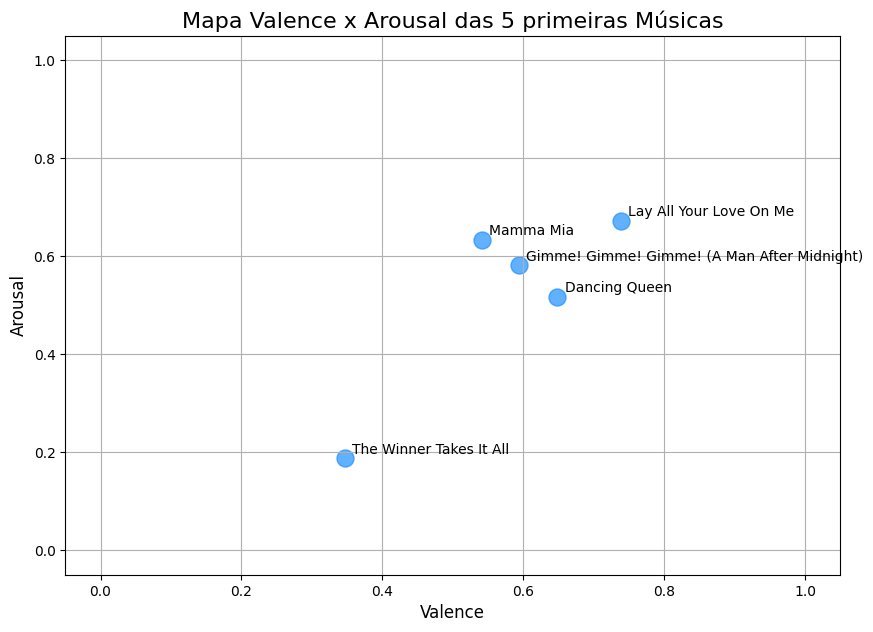

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_inicial.head(5)

musicas = df_plot['Música']
arousal = df_plot['Arousal']
valence = df_plot['Valence']

plt.figure(figsize=(10,7))
plt.scatter(valence, arousal, color='dodgerblue', s=150, alpha=0.7)

for i, musica in enumerate(musicas):
    plt.text(valence[i]+0.01, arousal[i]+0.01, musica, fontsize=10)

plt.title("Mapa Valence x Arousal das 5 primeiras Músicas", fontsize=16)
plt.xlabel("Valence", fontsize=12)
plt.ylabel("Arousal", fontsize=12)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.show()

---
# 9. Treinando Modelo

Para que o Sinton.IA consiga prever o Arousal e o Valence de novas músicas, utilizamos um modelo de Random Forest Regressor, um algoritmo de aprendizado de máquina usado para previsão de valores contínuos, ou seja, regressão. Ele faz parte da família dos métodos de ensemble, que combinam vários modelos mais simples para criar uma previsão mais robusta e precisa.


### 9.1. Como funciona:

**1. Árvores de Decisão:**

O modelo cria várias árvores de decisão.

Cada árvore aprende a prever a saída (Arousal e Valence) a partir das features (tempo, energia, brilho e polaridade) usando divisões em nós que minimizam o erro.

**2. Randomização:**

Cada árvore é treinada com um subconjunto aleatório dos dados e um subconjunto aleatório das features.

Isso evita que todas as árvores sejam iguais e melhora a capacidade de generalização do modelo.

**3. Combinação das Árvores:**

Para fazer uma previsão final, o Random Forest faz a média das previsões de todas as árvores (no caso de regressão).

Essa média reduz o risco de erros de uma única árvore e torna a previsão mais estável.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecionar features e labels
features = ['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']
X = df_inicial[features]

# Labels: Arousal e Valence
y = df_inicial[['Arousal', 'Valence']]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de regressão
modelo = RandomForestRegressor(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

# Avaliar
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro quadrático médio: {mse:.4f}")

Erro quadrático médio: 0.0058


In [ ]:
import numpy as np

# Exemplo de humor do usuário
user_arousal = 0.7
user_valence = 0.8

# Calcular distância entre usuário e músicas
distances = np.sqrt(
    (df_inicial['Arousal'] - user_arousal)**2 +
    (df_inicial['Valence'] - user_valence)**2
)

# Top 5 músicas mais próximas
recommended = df_inicial.iloc[distances.nsmallest(5).index]
print(recommended[['Música', 'Artista', 'Arousal', 'Valence']])

                          Música Artista   Arousal   Valence
15                           SOS    ABBA  0.673717  0.775186
3        Lay All Your Love On Me    ABBA  0.672829  0.738863
23  I Do, I Do, I Do, I Do, I Do    ABBA  0.617879  0.796185
42     I've Been Waiting For You    ABBA  0.704530  0.693397
22             Summer Night City    ABBA  0.752033  0.684154


# 10. Função de Recomendação

Com os valores de Arousal e Valence calculados para cada música, podemos agora construir a função principal do nosso agente. Esta função irá recomendar músicas com base no humor desejado pelo usuário.

A lógica é a seguinte:

1. Definir Perfis de Humor: Mapeamos emoções comuns (como "Feliz", "Calmo", "Triste", "Energético") para coordenadas específicas no espaço Valence-Arousal. Por exemplo, uma música "Feliz" teria alta Valence e alto Arousal.

2. Calcular a Distância: Para cada música no nosso DataFrame, calculamos a distância euclidiana entre o seu ponto (Valence, Arousal) e o ponto do humor alvo. A fórmula da distância é: D=
sqrt(V_alvo − V_música)^2 + (A_alvo − A_música)^2

3. Ordenar e Recomendar: As músicas com a menor distância são as mais próximas do sentimento desejado e, portanto, as mais recomendadas. A função retornará uma lista ordenada com as melhores correspondências.

In [ ]:
def prever_arousal_valence(df_features):
    # Normalizar usando o scaler já treinado
    X_scaled = scaler.transform(df_features[features])

    # Prever Arousal e Valence
    predicoes = modelo.predict(X_scaled)

    # Adicionar as previsões ao DataFrame original
    df_features['Arousal'] = predicoes[:, 0]
    df_features['Valence'] = predicoes[:, 1]

    return df_features

In [ ]:
def recomendar_musicas_modelo(df_modelo, humor, top_n, modelo, scaler):
    perfis_de_humor = {
        "feliz":      {"valence": 0.9, "arousal": 0.8},
        "calmo":      {"valence": 0.6, "arousal": 0.2},
        "triste":     {"valence": 0.2, "arousal": 0.3},
        "energetico": {"valence": 0.7, "arousal": 0.9},
        "focado":     {"valence": 0.4, "arousal": 0.3},
        "romantico":  {"valence": 0.9, "arousal": 0.4},
        "euforico":   {"valence": 0.9, "arousal": 0.9}
    }

    humor_selecionado = perfis_de_humor.get(humor.lower())
    if not humor_selecionado:
        print(f"Humor '{humor}' não reconhecido. Tente um dos seguintes: {list(perfis_de_humor.keys())}")
        return pd.DataFrame(), pd.DataFrame()

    target_valence = humor_selecionado["valence"]
    target_arousal = humor_selecionado["arousal"]

    # Features que o modelo espera
    features_modelo = ['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']

    # Filtrar músicas com features válidas
    df_filtrado = df_modelo.dropna(subset=features_modelo)
    if df_filtrado.empty:
        print("Não há músicas com features suficientes para previsão.")
        return pd.DataFrame(), pd.DataFrame()

    # Normalizar e prever Arousal e Valence
    X_scaled = scaler.transform(df_filtrado[features_modelo])
    predicoes = modelo.predict(X_scaled)
    df_filtrado = df_filtrado.copy()
    df_filtrado['Arousal'] = predicoes[:, 0]
    df_filtrado['Valence'] = predicoes[:, 1]

    # Calcular distância ao perfil de humor
    df_filtrado['Distancia'] = np.sqrt(
        (target_valence - df_filtrado['Valence'])**2 +
        (target_arousal - df_filtrado['Arousal'])**2
    )

    df_recomendado = df_filtrado.sort_values(by='Distancia', ascending=True)

    return df_recomendado.head(top_n), df_recomendado.tail(top_n)

# 11. Sinton.IA: Interface do Agente
Agora que todas as funções foram criadas, vamos construir a interface final que interage com o usuário. Este bloco de código irá:

1. Perguntar as Preferências: Solicitar ao usuário um termo de busca (artista, gênero ou palavra-chave) e o humor desejado para a playlist.

2. Executar o Pipeline: Chamar em sequência todas as funções que desenvolvemos:

- Buscar músicas na API do Deezer (fetchSongs).

- Extrair features de áudio (extract_audio_features).

- Analisar o sentimento das letras (fetchLyrics, analisar_sentimento).

- Calcular Arousal e Valence.

3. Gerar a Playlist: Utilizar a função recomendar_musicas para obter a lista final.

4. Exibir os Resultados: Apresentar a playlist recomendada de forma clara e organizada, permitindo que o usuário ouça uma prévia da música selecionada.

In [ ]:
from IPython.display import display, Audio
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

def pipeline_completo(modelo, scaler):
    print("🤖 Olá! Eu sou o Sinton.IA, seu assistente de playlists.")
    termo_busca = input("🎵 Para começar, digite um artista, gênero ou tema para a busca: ")
    humor_desejado = input("😃 Qual o sentimento que você busca? (feliz, calmo, triste, energetico, focado, romantico, euforico): ")

    count = 0
    novo_termo = ''
    fim = False  # controla saída do loop

    # Busca inicial
    print(f"\nBuscando músicas para '{termo_busca}'...")
    dados_musicas = fetchSongs(termo_busca, limit=30)  # menos músicas para acelerar
    df_modelo = insertSongsIntoDataFrame(dados_musicas)

    while count < 4:
        if fim:
            break

        if novo_termo != '':
            print('Adicionando novas músicas...')
            termo_busca = novo_termo
            limit = 15  # menos músicas em iterações posteriores
            dados_musicas = fetchSongs(termo_busca, limit)
            novo_df = insertSongsIntoDataFrame(dados_musicas)
            df_modelo = pd.concat([df_modelo, novo_df], ignore_index=True)

        if df_modelo.empty:
            print("Nenhuma música com prévia de áudio foi encontrada. Tente outro termo.")
            return

        print(f"Encontradas {len(df_modelo)} músicas. Analisando...")
        tempo_list, energy_list, spectral_centroid_list, spectral_bandwidth_list, letras_list = [], [], [], [], []

        # Extração de features e letras
        for idx, row in tqdm(df_modelo.iterrows(), total=len(df_modelo), desc="Extraindo features"):
            save_path = f"preview_{idx}.mp3"
            success = download_preview(row["Prévia_URL"], save_path)

            if success:
                features = extract_audio_features(save_path)
                os.remove(save_path)
            else:
                features = None

            if features:
                # Converter arrays para floats
                tempo_list.append(float(features['tempo'][0]) if isinstance(features['tempo'], np.ndarray) else float(features['tempo']))
                energy_list.append(float(features['energy'][0]) if isinstance(features['energy'], np.ndarray) else float(features['energy']))
                spectral_centroid_list.append(float(features['spectral_centroid'][0]) if isinstance(features['spectral_centroid'], np.ndarray) else float(features['spectral_centroid']))
                spectral_bandwidth_list.append(float(features['spectral_bandwidth'][0]) if isinstance(features['spectral_bandwidth'], np.ndarray) else float(features['spectral_bandwidth']))
            else:
                tempo_list.append(None)
                energy_list.append(None)
                spectral_centroid_list.append(None)
                spectral_bandwidth_list.append(None)

            letra = fetchLyrics(row['Artista'], row['Música'])
            letras_list.append(letra if letra else "")

        df_modelo["tempo"] = tempo_list
        df_modelo["energy"] = energy_list
        df_modelo["spectral_centroid"] = spectral_centroid_list
        df_modelo["spectral_bandwidth"] = spectral_bandwidth_list
        df_modelo['Letra'] = letras_list

        # Análise de sentimentos
        sentimentos = df_modelo['Letra'].apply(analisar_sentimento)
        df_modelo[['Polaridade', 'Subjetividade']] = pd.DataFrame(sentimentos.tolist(), index=df_modelo.index)

        df_modelo.dropna(subset=['tempo', 'energy', 'spectral_centroid'], inplace=True)
        if df_modelo.empty:
            print("Não foi possível extrair features suficientes.")
            return

        # Normalização das features para o modelo
        df_modelo['tempo_norm'] = (df_modelo['tempo'] - df_modelo['tempo'].mean()) / df_modelo['tempo'].std()
        df_modelo['energy_norm'] = (df_modelo['energy'] - df_modelo['energy'].mean()) / df_modelo['energy'].std()
        df_modelo['spectral_centroid_norm'] = (df_modelo['spectral_centroid'] - df_modelo['spectral_centroid'].mean()) / df_modelo['spectral_centroid'].std()
        df_modelo['Polaridade_norm'] = (df_modelo['Polaridade'] - df_modelo['Polaridade'].mean()) / df_modelo['Polaridade'].std()

        # Previsão de Arousal e Valence
        X_modelo = df_modelo[['tempo_norm', 'energy_norm', 'spectral_centroid_norm', 'Polaridade_norm']]
        predicoes = modelo.predict(X_modelo)
        df_modelo[['Arousal', 'Valence']] = predicoes

        top_n = 15
        print("\n✅ Análise concluída! Gerando playlist...")

        # Recomenda músicas usando o modelo
        playlist, playlist_negative = recomendar_musicas_modelo(df_modelo, humor_desejado, top_n, modelo, scaler)

        if playlist.empty:
            print("Não consegui gerar uma playlist com os critérios informados.")
            return

        print(f"\n--- SUA PLAYLIST '{humor_desejado.upper()}' ---")
        display(playlist[['Artista', 'Música', 'Arousal', 'Valence', 'Distancia']])

        print("\n🎧 Playlist criada com sucesso! Encerrando execução. 👋")
        break

        # Tocar prévia
        try:
            escolha = input("\n🎧 Digite o índice da música para ouvir a prévia ou 'sair' para finalizar: ")
            if escolha.lower() == 'sair':
                print("Até a próxima! 👋")
                fim = True
                continue

            indice_musica = int(escolha)
            if indice_musica in playlist.index:
                musica_selecionada = playlist.loc[indice_musica]
                novo_termo = musica_selecionada['Artista']
                print(f"Tocando: {musica_selecionada['Música']} - {musica_selecionada['Artista']}")
                display(Audio(url=musica_selecionada['Prévia_URL'], autoplay=True))
            else:
                print("Índice inválido.")
        except (ValueError, KeyError):
            print("Entrada inválida.")

        # Remover músicas já reproduzidas ou negativas
        df_modelo = df_modelo.drop(playlist.tail(2).index)
        df_modelo = df_modelo.drop(playlist_negative.head(7).index)

        count += 1

In [ ]:
pipeline_completo(modelo, scaler)

🤖 Olá! Eu sou o Sinton.IA, seu assistente de playlists.
🎵 Para começar, digite um artista, gênero ou tema para a busca: abba
😃 Qual o sentimento que você busca? (feliz, calmo, triste, energetico, focado, romantico, euforico): triste

Buscando músicas para 'abba'...
Encontradas 30 músicas. Analisando...


Extraindo features: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


✅ Análise concluída! Gerando playlist...

--- SUA PLAYLIST 'TRISTE' ---



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Artista,Música,Arousal,Valence,Distancia
1,ABBA,The Winner Takes It All,0.312991,0.310624,0.111384
5,ABBA,Chiquitita,0.312991,0.310624,0.111384
14,ABBA,The Day Before You Came,0.312991,0.310624,0.111384
10,ABBA,Super Trouper,0.312991,0.310624,0.111384
25,ABBA,Our Last Summer,0.312991,0.310624,0.111384
19,ABBA,I Have A Dream,0.312991,0.310624,0.111384
9,ABBA,Fernando,0.325002,0.312531,0.115275
8,ABBA,"Money, Money, Money",0.366027,0.312147,0.130140
29,ABBA,"Andante, Andante",0.345158,0.333488,0.140919
4,ABBA,Mamma Mia,0.464731,0.289740,0.187589



🎧 Playlist criada com sucesso! Encerrando execução. 👋


---
# 12. Conclusão

Este projeto demonstrou o desenvolvimento do Sinton.IA, um agente inteligente capaz de criar playlists personalizadas com base no estado emocional e nas preferências musicais do usuário. Partindo de um simples termo de busca, o agente foi capaz de coletar, processar e analisar dados de múltiplas fontes para gerar recomendações musicais relevantes e contextuais.

Sinton.IA foi fundamentado na integração de diversas técnicas de Inteligência Artificial, que foram cruciais em cada etapa do processo:

* Processamento de Linguagem Natural (PLN) para Análise de Sentimentos: Utilizamos a biblioteca TextBlob para analisar as letras das músicas. Esta técnica de PLN permitiu quantificar o sentimento expresso no texto (positivo, negativo ou neutro) através da métrica de Polaridade, que se tornou um pilar fundamental para a construção da dimensão emocional Valence.

* Extração de Características de Áudio (Audio Feature Extraction): Com o auxílio da biblioteca librosa, extraímos características acústicas das prévias de áudio, como tempo, energy (energia) e spectral_centroid (brilho sonoro). Essas features transformaram o áudio em dados numéricos que representam a intensidade e o tom da música, servindo de base para a dimensão Arousal.

* Aprendizado de Máquina Supervisionado (Regressão): O núcleo do nosso agente é um modelo de Random Forest Regressor, treinado com as características de áudio e texto. Esta técnica de aprendizado supervisionado permitiu que o sistema aprendesse a prever os valores de Arousal (excitação) e Valence (valência emocional) para qualquer música, generalizando o conhecimento adquirido para além dos dados de treinamento.

* Sistema de Recomendação Baseado em Conteúdo (Content-Based Filtering): A recomendação final é realizada por um sistema que calcula a distância Euclidiana entre o perfil emocional desejado pelo usuário (ex: "feliz") e as coordenadas (Arousal, Valence) de cada música. As músicas com a menor distância são as mais compatíveis, caracterizando uma abordagem de recomendação baseada no conteúdo intrínseco de cada faixa.

Em suma, o Sinton.IA foi desenvolvido como a combinação de análise de áudio, processamento de texto e modelos de Machine Learning pode resolver o desafio complexo de recomendação musical. O projeto não apenas atingiu seu objetivo principal de gerar playlists personalizadas, mas também serviu como uma aplicação prática e robusta dos conceitos fundamentais de Inteligência Artificial.